# Importing MIB Datasets

This notebook demonstrates loading Merlin/Medipix mib datasets using pyxem.

This functionaility has been checked to run in pyxem-0.13.0 (Jan 2021). Bugs are always possible, do not trust the code blindly, and if you experience any issues please report them here: https://github.com/pyxem/pyxem-demos/issues

## Contents

1. <a href='#mib'> Direct mib loading (for smaller data)</a>
2. <a href='#h5'> Loading via h5 conversion (for larger data)</a>

Import pyxem and other required libraries

In [1]:
%matplotlib inline
import pyxem as pxm

<a id='mib'></a>

##  1. Direct mib loading

Specify path to test dataset, which is a RAW 6-bit read-out from a quad Merlin/Medipix detector.

In [2]:
data_path = './data/00/test_data.mib'

Load the mib file directly into pyxem by using the load_mib function. The data will be automatically re-shaped to the scan dimensions (10 by 12) based on overexposure of the flyback pixel.

In [3]:
dp = pxm.load_mib(data_path)

reshaping using flyback pixel


Inspect the loaded object

In [4]:
print(dp)

<LazyElectronDiffraction2D, title: , dimensions: (10, 12|515, 515)>


Inspect the metadata. Note that the number of probe positions in x (scan_x) is outputed as 11, including the bright pixel corresponding to flyback that is cropped in the returned data. The exposure time per frame in seconds and also the times for the overexposed flyback frames. By default a vertical flip is applied to the diffraction pattern.

In [5]:
dp.metadata

├── General
│   └── title = 
└── Signal
    ├── binned = False
    ├── exposure_time = 0.001
    ├── flip = True
    ├── flyback_times = [0.057]
    ├── frames_number_skipped = 0
    ├── scan_X = 11
    └── signal_type = electron_diffraction

This object is a lazy signal, so before plotting we need to compute the object

In [6]:
dp.compute()

[########################################] | 100% Completed |  0.1s


Plot the data

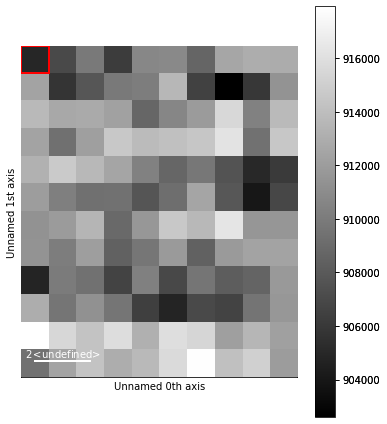

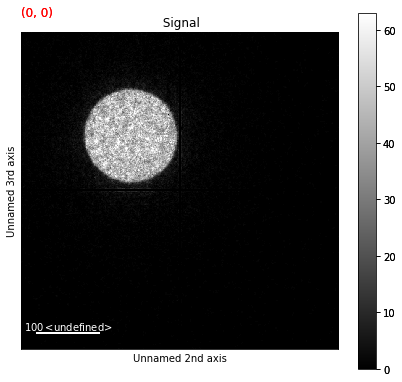

In [7]:
dp.plot()

<a id='h5'></a>

##  2. Loading via h5 conversion

If the mib data is 1 bit and large scan array, e.g. 512*512, the dask operation done for the other bit depths would fail, requiring the full loading of data into disk. This makes the lazy loading of this format using the load_mib method above very memory-intensive.

To solve this issue, in pyxem we can use the mib_to_h5stack method to convert the data to an h5 file 

In [8]:
h5_path = './data/00/test_data.h5'

pxm.utils.io_utils.mib_to_h5stack(data_path, h5_path)

The h5 path provided already exists. Change file name to avoid overwrite.


Load the h5 file lazily

In [9]:
dp = pxm.utils.io_utils.h5stack_to_pxm(h5_path, data_path)

reshaping using flyback pixel


Inspect the loaded object

In [10]:
print(dp)

<LazyElectronDiffraction2D, title: , dimensions: (10, 12|515, 515)>


Compute the object

In [11]:
dp.compute()

[########################################] | 100% Completed |  0.1s


Plot the object

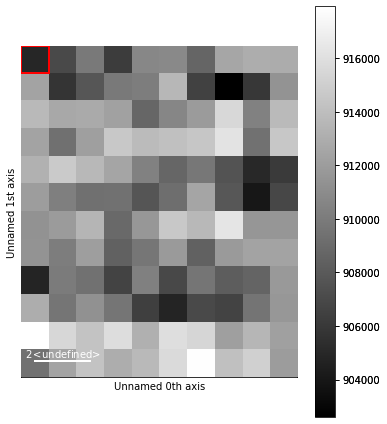

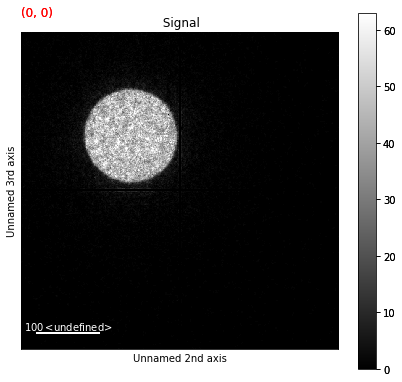

In [12]:
dp.plot()

Inspect the metadata

In [13]:
dp.metadata

├── General
│   └── title = 
└── Signal
    ├── binned = False
    ├── exposure_time = 0.001
    ├── flip = True
    ├── flyback_times = [0.057]
    ├── frames_number_skipped = 0
    ├── scan_X = 11
    └── signal_type = electron_diffraction